<a href="https://colab.research.google.com/github/Sam-Wadmare/ML-LAB/blob/main/lab/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.7989
Precision: 0.8082
Recall: 0.7806
F1-score: 0.7941
ROC AUC: 0.8765


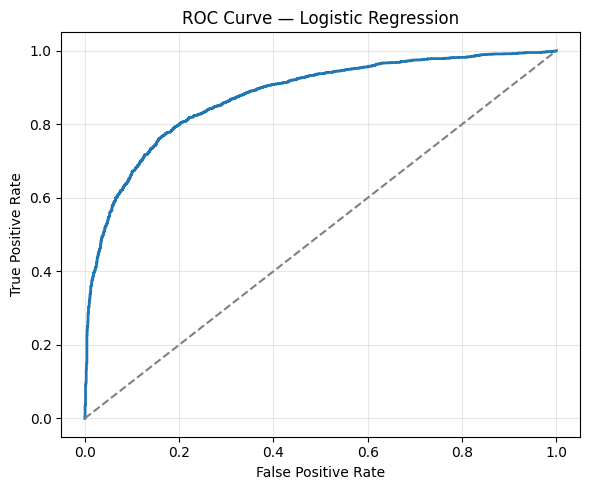

In [4]:
# exp5_logistic.py
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# 1. Load data
data = fetch_california_housing(as_frame=True)
X = data.data[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]]
y_reg = data.target  # continuous

# 2. Make a binary target: 1 if MedHouseVal above median, else 0
threshold = y_reg.median()
y = (y_reg > threshold).astype(int)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Fit Logistic Regression (minimal: default solver is fine for this small dataset)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 5. Predict & evaluate
y_prob = model.predict_proba(X_test)[:, 1]   # probability of class 1
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", round(acc,4))
print("Precision:", round(prec,4))
print("Recall:", round(rec,4))
print("F1-score:", round(f1,4))
print("ROC AUC:", round(auc,4))

# 6. Essential plot: ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
